In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


# Begin

Read train and test data:

In [2]:
train = pd.read_csv('../input/30-days-of-ml/train.csv')
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,499996,A,B,A,C,B,B,A,E,E,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,499997,B,B,A,C,B,C,A,E,G,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,499998,A,B,A,C,B,B,A,E,E,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [3]:
test = pd.read_csv('../input/30-days-of-ml/test.csv')
test

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,B,A,A,C,B,D,A,E,E,...,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
199996,499990,B,A,A,C,B,B,A,E,C,...,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
199997,499991,A,B,B,C,B,B,A,E,C,...,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416
199998,499994,A,A,A,C,B,D,A,D,A,...,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473


We can see that there are both categorical and numerical data in our dataset. We will separate them to two groups by type:

In [4]:
cat_features = [col for col in test.columns if test[col].dtype == object]
print("Total categorical features:", len(cat_features))

Total categorical features: 10


In [5]:
num_features = [col for col in test.columns if test[col].dtype != object]
num_features.remove('id') #Since ID is numerical but has no relative information to provide
print("Total numerical features:", len(num_features))

Total numerical features: 14


Now, let us see the summary of each numerical features:

In [6]:
train[num_features].describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992


We can see that numerical features are not evenly distributed and may need some normalization and scaling before being applied to the models.

In [7]:
train[cat_features].describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249


There is an obvious imbalance to the category features.

# Feature Engineering

In [8]:
def create_features(df):
    #for c1 in num_features:
    #    for c2 in num_features:
    #        if c1==c2: continue
    #        #Create diffs per pair of continuous cols
    #        df[f'{c1}-{c2}'] = df[c1] - df[c2]
    #        #pass
            
    #Convert cat to sparse
    df[cat_features] = df[cat_features].apply(lambda x: [ord(c) - 65 for c in x])
    
    return df

In [9]:
train = create_features(train)
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,1,1,1,2,1,1,0,4,2,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,1,1,0,0,1,3,0,5,0,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,0,0,0,2,1,3,0,3,0,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,1,1,0,2,1,3,0,4,2,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,0,0,0,2,1,3,0,4,0,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,1,1,0,0,1,3,0,4,0,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,499996,0,1,0,2,1,1,0,4,4,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,499997,1,1,0,2,1,2,0,4,6,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,499998,0,1,0,2,1,1,0,4,4,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [10]:
test = create_features(test)
test

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1,1,1,2,1,1,0,4,4,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,0,1,0,2,1,2,0,4,2,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,1,0,0,0,1,1,0,4,3,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,1,1,0,2,1,3,0,4,0,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,1,1,0,2,1,2,0,4,2,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,1,0,0,2,1,3,0,4,4,...,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
199996,499990,1,0,0,2,1,1,0,4,2,...,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
199997,499991,0,1,1,2,1,1,0,4,2,...,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416
199998,499994,0,0,0,2,1,3,0,3,0,...,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473


In [11]:
all_cols = test.columns.tolist()
all_cols.remove('id')
print("Total number of features:", len(all_cols))

Total number of features: 24


In [12]:
#Normalization
num_features = [col for col in all_cols if not col.startswith('cat')]

MIN = train[num_features].min()
DIV = train[num_features].max() - MIN
train[num_features] = (train[num_features] - MIN)/DIV
train[num_features].describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.548563,0.554313,0.501098,0.402707,0.294861,0.454728,0.517994,0.402083,0.583413,0.412676,0.422704,0.412833,0.542075,0.473179
std,0.196007,0.223721,0.232255,0.241173,0.300274,0.223377,0.157405,0.263113,0.184482,0.252024,0.254113,0.217917,0.235686,0.295321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445400,0.397051,0.327012,0.219067,0.035372,0.301669,0.424745,0.183411,0.455793,0.218465,0.225654,0.250819,0.346232,0.198186
50%,0.522823,0.519790,0.512066,0.367869,0.168305,0.433528,0.489486,0.362932,0.537811,0.366143,0.408292,0.374157,0.473765,0.425662
75%,0.668178,0.715502,0.645041,0.587286,0.551198,0.610442,0.597251,0.602694,0.666150,0.573898,0.638234,0.578551,0.751694,0.804561
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
test[num_features] = (test[num_features] - MIN)/DIV
test[num_features].describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.548157,0.554268,0.502187,0.402238,0.295544,0.454158,0.518424,4.026825e-01,0.582745,0.412397,0.421844,0.413199,0.540355,0.473220
std,0.195928,0.223609,0.231802,0.241289,0.300495,0.223248,0.157282,2.631820e-01,0.184034,0.251505,0.253475,0.217743,0.235508,0.295357
min,0.000039,-0.000007,0.000008,-0.000022,-0.000006,0.000006,0.000057,-1.688462e-07,0.000030,-0.000003,0.000002,0.000007,0.000006,0.000002
25%,0.445248,0.397094,0.328466,0.218058,0.035372,0.301220,0.424700,1.842037e-01,0.456005,0.218541,0.224635,0.251157,0.345298,0.198223
50%,0.522439,0.519533,0.512628,0.367389,0.174071,0.433051,0.489813,3.636025e-01,0.537477,0.366131,0.408359,0.374201,0.472982,0.425723
75%,0.666757,0.715427,0.645702,0.586131,0.552014,0.609425,0.597609,6.025112e-01,0.665622,0.569776,0.636808,0.578693,0.748393,0.804627
max,0.999992,1.000000,0.999984,0.999997,0.999998,0.999992,0.999991,9.999830e-01,0.999984,1.000007,0.999995,1.000001,0.999997,1.000028


# Model Creation

Since the categorical features are heavily imbalanced, we will be implementing a tree-based model like LightGBM and XGBoost as our models. For this exercise, we will use LightGBM as our main model.

In [14]:
import lightgbm as lgbm

seed = np.random.randint(1, 1e5)
print("Using SEED:", seed)

params = {
    "objective": "rmse",
    "metric": "rmse",
    "boosting_type": 'gbdt', #"gbdt", "dart"
    #"xgboost_dart_mode": True,
    'device_type': 'cpu', #'gpu', 'cuda'
    #'drop_rate': 0.5, #For dart type only
    'seed': seed,
    #'deterministic': True,
    'tree_learner': 'data',
    'num_threads': 4,
    'max_bin': 512,
    'max_depth': 20,
    'num_leaves': 15,
    'early_stopping_rounds': 500,
    'lambda_l1': 1.75,
    'lambda_l2': 3.25,
    'cat_l2': 1.25,
    'learning_rate': 0.005,
    'feature_fraction': 0.25,
    "feature_fraction_seed": seed,
    'bagging_fraction': 0.75,
    'bagging_freq': 50,
    'bagging_seed': seed,
    'force_col_wise': True,
    #'min_data_in_leaf': 27,
    'path_smooth': 2.5,
    'cat_smooth': 2.5,
  }

Using SEED: 94130


In [15]:
import time
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold

def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

#Silence LGBM warnings
import warnings
warnings.filterwarnings("ignore")


lgbm_models = []
lgbm_history = []
target_cols = 'target'

X = train[all_cols]
y = train[target_cols]

kf = KFold(n_splits=5, random_state=seed, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
    print("Fold :", fold+1)
    st_time = time.time()
    evals_result = {} #Record evaluation results to dict
    # create dataset
    X_train, y_train = X.loc[trn_idx], y[trn_idx]
    X_valid, y_valid = X.loc[val_idx], y[val_idx]
    
    #LGBM Model Training ###################################################################
    lgbm_train = lgbm.Dataset(X_train, y_train)
    lgbm_valid = lgbm.Dataset(X_valid, y_valid, reference=lgbm_train)

    model_lgbm = lgbm.train(
        params=params,
        train_set=lgbm_train,
        valid_sets=[lgbm_train, lgbm_valid],
        num_boost_round=100000,
        verbose_eval=1000,
        categorical_feature=cat_features,
        evals_result=evals_result,
    )

    lgbm_y_pred = model_lgbm.predict(X_valid, num_iteration=model_lgbm.best_iteration)
    score = RMSE(y_true=y_valid, y_pred=lgbm_y_pred)
    print(f'Performance of the　LGBM prediction MSE: {score:.5}')
    #Lower RMSPE yields higher prediction weight during ensemble
    lgbm_models.append((max(0, 1- score**2), model_lgbm))
    lgbm_history.append(evals_result)
    diff_time = time.time() - st_time
    print(f"Total time spent on fold: {int(diff_time/60)} min {round(diff_time%60, 4)} sec")
    print("#"*100)

Fold : 1
[LightGBM] [Info] Total Bins 7228
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 24
[LightGBM] [Info] Start training from score 8.242159
Training until validation scores don't improve for 500 rounds
[1000]	training's rmse: 0.729358	valid_1's rmse: 0.731365
[2000]	training's rmse: 0.723022	valid_1's rmse: 0.726255
[3000]	training's rmse: 0.719279	valid_1's rmse: 0.723644
[4000]	training's rmse: 0.716631	valid_1's rmse: 0.722135
[5000]	training's rmse: 0.714549	valid_1's rmse: 0.721233
[6000]	training's rmse: 0.712751	valid_1's rmse: 0.72054
[7000]	training's rmse: 0.711202	valid_1's rmse: 0.720142
[8000]	training's rmse: 0.709713	valid_1's rmse: 0.719814
[9000]	training's rmse: 0.708324	valid_1's rmse: 0.719589
[10000]	training's rmse: 0.706967	valid_1's rmse: 0.719345
[11000]	training's rmse: 0.705679	valid_1's rmse: 0.719188
[12000]	training's rmse: 0.704427	valid_1's rmse: 0.719059
[13000]	training's rmse: 0.703215	valid_1's rmse: 

# Train History

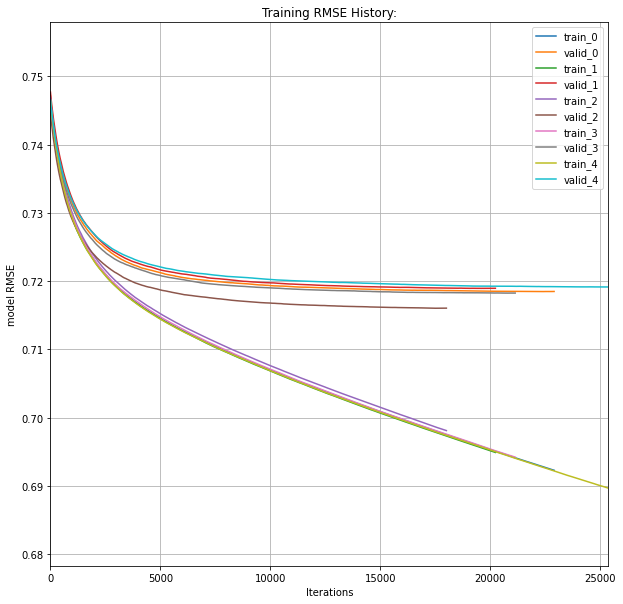

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
legends = []
for n, model in enumerate(lgbm_history):
    lgbm.plot_metric(model, metric='rmse', ax=ax, ylabel=f'model RMSE')
    legends += [f'train_{n}', f'valid_{n}']
plt.title('Training RMSE History:')
plt.legend(legends)
plt.savefig('mse_history_plot.png')

# Feature Importance

  0%|          | 0/5 [00:00<?, ?it/s]

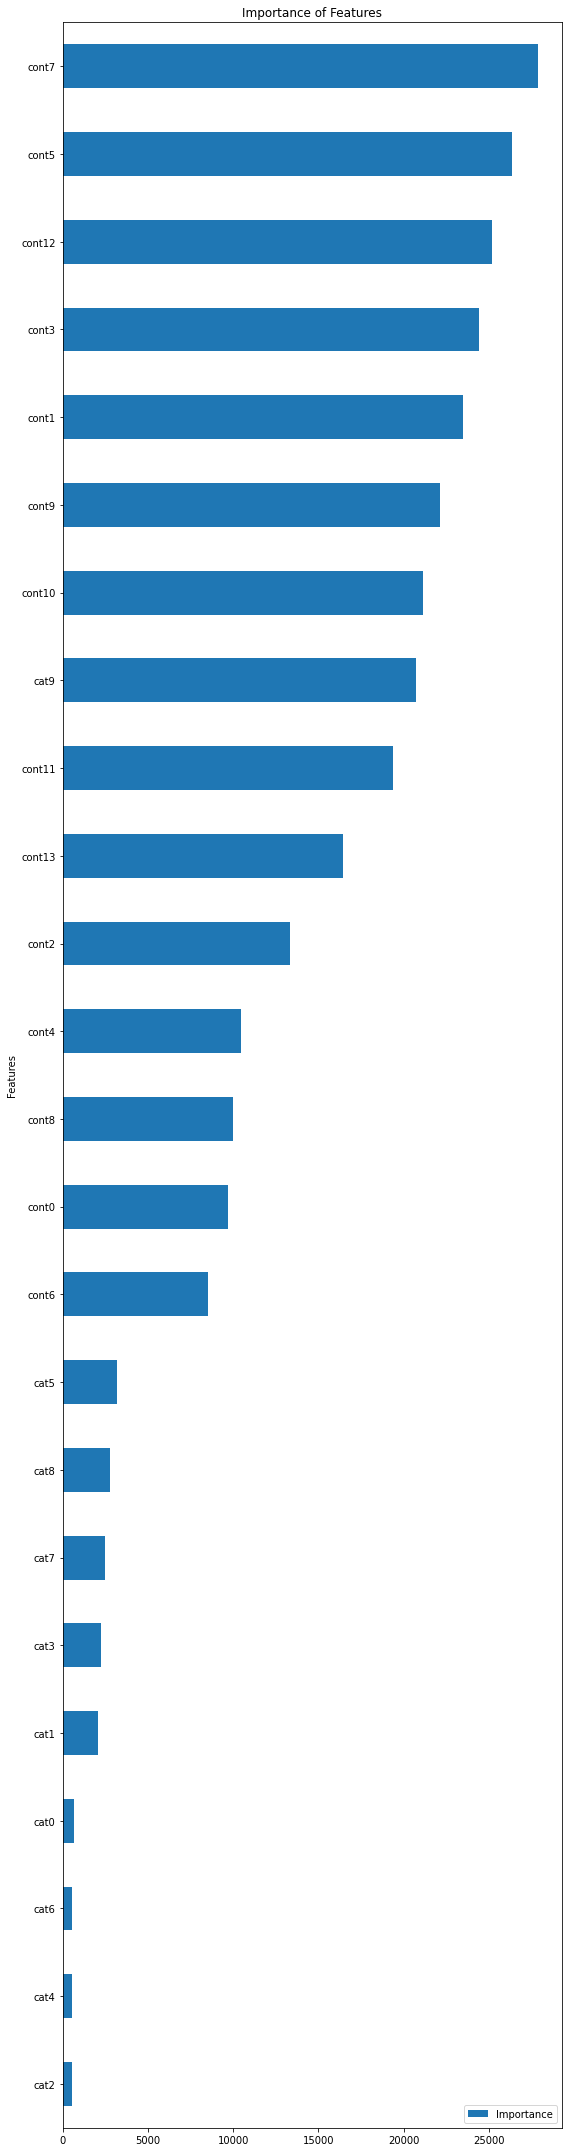

In [17]:
from tqdm.notebook import tqdm
divisor = sum(score for score, _ in lgbm_models)

try:
    feature_importance = np.zeros((len(all_cols)))
    
    for score, model in tqdm(lgbm_models):
        feature_importance += model.feature_importance() * score / divisor
        
    importance_df = pd.DataFrame({'Features':all_cols,
                                  'Importance': feature_importance}
                                ).sort_values('Importance')
    
    fig, ax = plt.subplots(figsize=(8, 30))
    importance_df.plot.barh(x='Features', y='Importance', ax=ax)
    plt.title("Importance of Features")
    plt.tight_layout()
    plt.savefig('combined_weighted_importance.png')
    
except Exception as e:
    print(e)

# Ensemble

In [18]:
#Test ensemble
target = np.zeros(len(train))

for score, model in tqdm(lgbm_models):
    pred = model.predict(train[all_cols], num_iteration=model.best_iteration)
    target += pred * (score/divisor)
    print(f"Singular score: {RMSE(train[target_cols], pred):.5}")

score = RMSE(y_true = train[target_cols], y_pred = target)
print(f'Performance of the Ensemble LGBM (outliers) prediction RMSE: {score:.5}')

  0%|          | 0/5 [00:00<?, ?it/s]

Singular score: 0.69802
Singular score: 0.70021
Singular score: 0.70215
Singular score: 0.6995
Singular score: 0.69606
Performance of the Ensemble LGBM (outliers) prediction RMSE: 0.69854


# Prediction

In [19]:
target = np.zeros(len(test))

#light gbm models
for score, model in tqdm(lgbm_models):
    pred = model.predict(test[all_cols], num_iteration=model.best_iteration)
    target += pred * (score/divisor)
test['target'] = target
test[['id', 'target']].to_csv('submission.csv', index=False)

#Check if submission is saved
sub = pd.read_csv('submission.csv')
display(sub)

  0%|          | 0/5 [00:00<?, ?it/s]

,id,target
0,0,8.031867
1,5,8.356158
2,15,8.376619
3,16,8.469829
4,17,8.185328
...,...,...
199995,499987,8.070470
199996,499990,8.472589
199997,499991,8.478111
199998,499994,8.127552
